In [3]:
# Import dependencies
import pandas as pd
from path import Path

from sklearn import tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sqlalchemy import create_engine

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

In [4]:
# Do not put in combined file
file = "Resources/machine_learning_df.csv"
machine_learning_df = pd.read_csv(file)

In [7]:
# You do not need to include this in the combined file
machine_learning_df.describe

<bound method NDFrame.describe of           id age_upon_outcome animal_id_outcome        date_of_birth  \
0          1         10 years           A006100  2007-07-09 00:00:00   
1          2          7 years           A006100  2007-07-09 00:00:00   
2          3          6 years           A006100  2007-07-09 00:00:00   
3          4         10 years           A047759  2004-04-02 00:00:00   
4          5         16 years           A134067  1997-10-16 00:00:00   
...      ...              ...               ...                  ...   
79667  79668          2 weeks           A769060  2018-03-14 00:00:00   
79668  79669          2 years           A769064  2016-03-29 00:00:00   
79669  79670           1 year           A769065  2017-03-29 00:00:00   
79670  79671        10 months           A769066  2017-05-01 00:00:00   
79671  79672         10 years           A769067  2008-03-29 00:00:00   

          outcome_type sex_upon_outcome  age_upon_outcome_days  \
0      Return to Owner    Neutered 

In [8]:

machine_learning_df.dtypes

id                              int64
age_upon_outcome               object
animal_id_outcome              object
date_of_birth                  object
outcome_type                   object
sex_upon_outcome               object
age_upon_outcome_days           int64
age_upon_outcome_years        float64
age_upon_outcome_age_group     object
outcome_datetime               object
outcome_month                   int64
outcome_year                    int64
outcome_monthyear              object
outcome_weekday                object
outcome_hour                    int64
outcome_number                float64
dob_year                        int64
dob_month                       int64
dob_monthyear                  object
age_upon_intake                object
animal_id_intake               object
found_location                 object
intake_condition               object
intake_type                    object
sex_upon_intake                object
count                           int64
age_upon_int

In [19]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
# May need to get dummies for animal sex
new_fit = machine_learning_df[['age_upon_outcome_days','age_upon_outcome_years','outcome_month','outcome_year','outcome_hour',
                              'dob_year','dob_month','intake_month','intake_year','time_in_shelter_days','Adoption']].copy()
new_fit = new_fit.astype('int64')
ml_fit_df = pd.DataFrame(enc.fit_transform(new_fit))

In [20]:
# X
X = new_fit.copy()
X = X.drop(columns=['Adoption'])
X.head()

,age_upon_outcome_days,age_upon_outcome_years,outcome_month,outcome_year,outcome_hour,dob_year,dob_month,intake_month,intake_year,time_in_shelter_days
0,3650,10,12,2017,0,2007,7,12,2017,0
1,2555,7,12,2014,16,2007,7,12,2014,1
2,2190,6,3,2014,17,2007,7,3,2014,1
3,3650,10,4,2014,15,2004,4,4,2014,4
4,5840,16,11,2013,11,1997,10,11,2013,0


In [21]:
# y
y = new_fit['Adoption'].values.reshape(-1,1)

In [22]:
# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# Create a StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled.head()

In [49]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier(max_depth=4)

In [50]:
# Fit the model
model = model.fit(X_train_scaled, y_train)

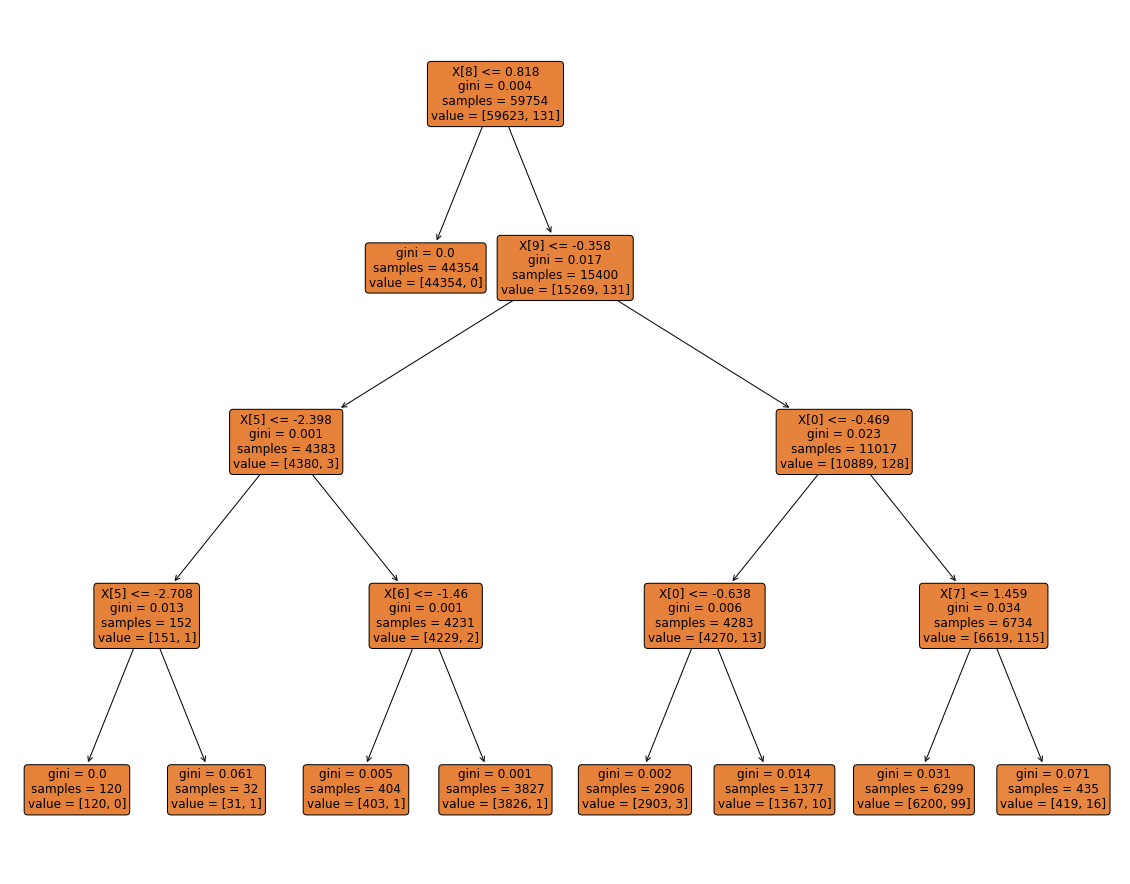

In [51]:
# Plot tree model
plt.figure(figsize=(20,16))
tree.plot_tree(model,
              filled=True,
              rounded=True,  
              fontsize=12)
plt.show()

In [41]:
# Make predictions from test data
predictions = model.predict(X_test_scaled)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
# Calculate confusion matrix (Not Adpoted = 0, Adopted = 1)
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix
animals_cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
animals_cm_df

,Predicted 0,Predicted 1
Actual 0,19870,0
Actual 1,48,0


In [29]:
# Calculate accuracy score
acc_score = accuracy_score(y_test, predictions)

In [30]:
# Display results
print("Confusion Matrix")
display(animals_cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,19819,51
Actual 1,48,0


Accuracy Score : 0.9950296214479365
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19870
           1       0.00      0.00      0.00        48

    accuracy                           1.00     19918
   macro avg       0.50      0.50      0.50     19918
weighted avg       1.00      1.00      1.00     19918

